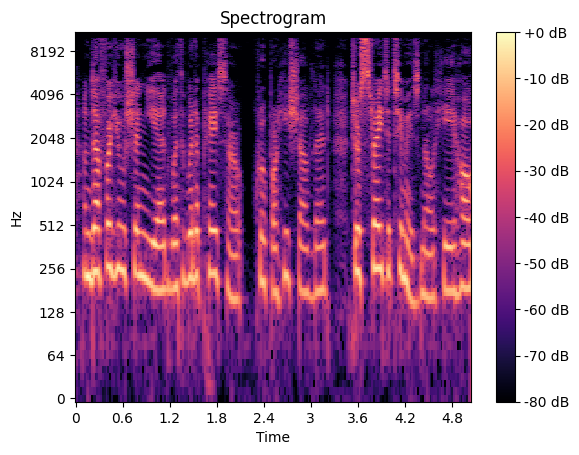

In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

file_path = 'samples/sample-2.mp3'
y, sr = librosa.load(file_path, sr=None)

D = librosa.stft(y)

mag = np.abs(D)

librosa.display.specshow(librosa.amplitude_to_db(mag, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()